# CZ4015 LAB Assignment 1 Part 2 - Seungju Lee (N1904291J)

## 1. Input Analysis

Before the simulation, input analysis should be done. Therefore, by using data from the given excel file, I tried to find out distributions and their own parameter values of interarrival time, base station, call duration, and velocity.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
given_data = pd.read_excel("PCS_TEST_DETERMINSTIC_19S2.xls", index_col='Arrival no')

In [3]:
given_data

,Arrival time (sec),Base station,Call duration (sec),velocity (km/h)
Arrival no,,,,
1,0.000000,18,76.133611,125.934254
2,0.067744,7,159.056244,95.510881
3,0.559184,6,179.465053,127.757456
4,0.625319,14,163.108320,134.310552
5,1.345066,2,95.054472,112.272359
...,...,...,...,...
9996,13692.269647,4,116.119337,119.601001
9997,13692.593630,16,37.970440,114.278648
9998,13694.615122,3,31.919218,123.540944


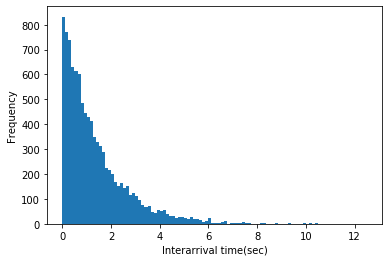

In [4]:
int_ar = np.diff(given_data['Arrival time (sec)'])
plt.hist(int_ar, bins = int(np.sqrt(len(given_data.index))))
plt.xlabel('Interarrival time(sec)')
plt.ylabel('Frequency')
plt.show()

The histogram of interarrival time looks similar to the probability density function of an exponential distribution.
Therefore, I hypothesize the data has an exponential distribution.

In [5]:
# Estimation of parameter(MLE)
int_ar_param = np.mean(int_ar)
int_ar_param

1.3698169264765245

Then, it is necessary to verify that this hypothesis(Interarrival time follows exponential distribution with parameter int_ar_param) agree with the observed data. So, I conducted a chi-square test.

In [6]:
intervals = []
k = int(np.sqrt(len(given_data.index)))
p = 1/k
for i in range(k):
    intervals.append(int_ar_param * np.log(1/(1-i*p)))

N = [0]*k

for element in int_ar:
    if element >= intervals[k-1]:
        N[k-1] += 1
    else:
        for j in range(k-1):
            if element >= intervals[j] and element < intervals[j+1]:
                N[j] += 1

expected = p * len(given_data.index)
stat = 0
for i in range(k):
    stat += ((N[i] - expected)**2) / expected # final "stat" would be test statistic

print("Test statistic: {}".format(stat))
print("Critical value with alpha=0.05: {}".format(stats.chi2.ppf(0.95, 100-1-1)))
if stat > stats.chi2.ppf(0.95,100-1-1):
    print("The null hypothesis rejected. Do not use exponential distribution with current parameter!")
else:
    print("The null hypothesis cannot be rejected. Use exponential distribution with current parameter!")

Test statistic: 111.64999999999999
Critical value with alpha=0.05: 122.10773460981942
The null hypothesis cannot be rejected. Use exponential distribution with current parameter!


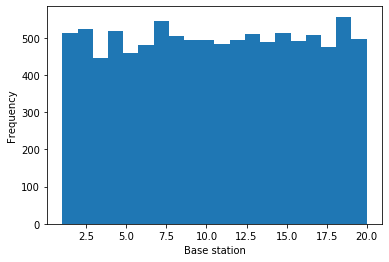

In [7]:
plt.hist(given_data['Base station '], bins=20)
plt.xlabel('Base station')
plt.ylabel('Frequency')
plt.show()

The histogram of base station distribution looks like it has uniform distribution. Therefore, I hypothesize the data is uniformly distributed among integer values from 1 to 20. I conducted a chi-square test to check the goodness of fit.

In [8]:
N = [0]*20

for element in given_data['Base station ']:
    for i in range(20):
        if element == i+1:
            N[i] += 1

expected = len(given_data.index) / 20
stat = 0
for i in range(20):
    stat += ((N[i] - expected)**2) / expected # final "stat" would be test statistic

print("Test statistic: {}".format(stat))
print("Critical value with alpha=0.05: {}".format(stats.chi2.ppf(0.95, 20-1)))
if stat > stats.chi2.ppf(0.95,20-1):
    print("The null hypothesis rejected. Do not use uniform distribution!")
else:
    print("The null hypothesis cannot be rejected. Use uniform distribution!")

Test statistic: 25.656
Critical value with alpha=0.05: 30.14352720564616
The null hypothesis cannot be rejected. Use uniform distribution!


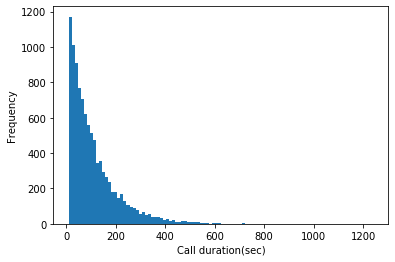

In [9]:
plt.hist(given_data['Call duration (sec)'], bins = int(np.sqrt(len(given_data.index))))
plt.xlabel('Call duration(sec)')
plt.ylabel('Frequency')
plt.show()

There is a slight gap between the minimum value of call duration and 0.

In [10]:
gap = min(given_data['Call duration (sec)'])
gap

10.003951603252272

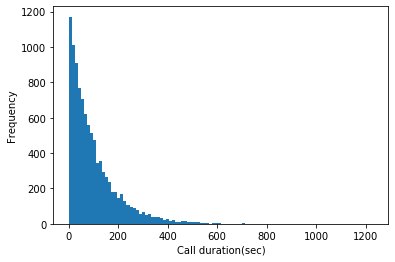

In [11]:
plt.hist((given_data['Call duration (sec)']-gap), bins = int(np.sqrt(len(given_data.index))))
plt.xlabel('Call duration(sec)')
plt.ylabel('Frequency')
plt.show()

The histogram of (duration-gap) looks similar to the probability density function of an exponential distribution.
Therefore, I hypothesize the data(duration - gap) has an exponential distribution.

In [12]:
# Estimation of parameter(MLE)
duration_param = (given_data['Call duration (sec)']-gap).mean()
duration_param

99.83194913549607

To check the goodness of fit, I conducted a chi-square test with duration parameter.

In [13]:
intervals = []
k = int(np.sqrt(len(given_data.index)))
p = 1/k
for i in range(k):
    intervals.append(duration_param * np.log(1/(1-i*p)))

N = [0]*k

for element in given_data['Call duration (sec)']:
    if (element-gap) >= intervals[k-1]:
        N[k-1] += 1
    else:
        for j in range(k-1):
            if (element-gap) >= intervals[j] and (element-gap) < intervals[j+1]:
                N[j] += 1

expected = p * len(given_data.index)
stat = 0
for i in range(k):
    stat += ((N[i] - expected)**2) / expected # final "stat" would be test statistic

print("Test statistic: {}".format(stat))
print("Critical value with alpha=0.05: {}".format(stats.chi2.ppf(0.95, 100-1-1)))
if stat > stats.chi2.ppf(0.95,100-1-1):
    print("The null hypothesis rejected. Do not use exponential distribution with current parameter!")
else:
    print("The null hypothesis cannot be rejected. Use exponential distribution with current parameter!")

Test statistic: 97.01999999999998
Critical value with alpha=0.05: 122.10773460981942
The null hypothesis cannot be rejected. Use exponential distribution with current parameter!


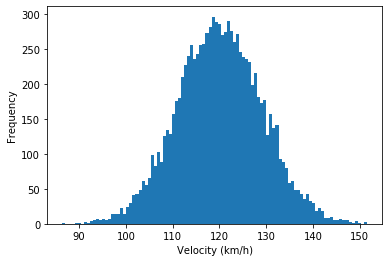

In [14]:
plt.hist(given_data['velocity (km/h)'], bins = int(np.sqrt(len(given_data.index))))
plt.xlabel('Velocity (km/h)')
plt.ylabel('Frequency')
plt.show()

The histogram of velocity looks similar to the probability density function of a normal distribution.
Therefore, I hypothesize the data has a normal distribution.

In [15]:
# Estimation of parameter(MLE)
velocity_mean = given_data['velocity (km/h)'].mean()
velocity_std = given_data['velocity (km/h)'].std()
print(velocity_mean)
print(velocity_std)

120.07209801685805
9.01905789789691


To check the goodness-of-fit, I conducted a normality test using inbuilt method in scipy.stats from python.

In [16]:
statistic, p_value = stats.normaltest(given_data['velocity (km/h)'])
if p_value < 0.001:
    print("The null hypothesis rejected. Do not use normal distribution with current parameter!")
else:
    print("The null hypothesis cannot be rejected. Use normal distribution with current parameter!")        

The null hypothesis cannot be rejected. Use normal distribution with current parameter!


## 2. Basic settings for the simulation model

### 2-1. Enums

Use inbuilt Enum method to build a class with different types

In [17]:
from enum import Enum, auto

class Event_type(Enum):
    CALL_INITIATION = auto()
    CALL_TERMINATION = auto()
    CALL_HANDOVER = auto()
    
class FCA_scheme(Enum):
    NO_RESERVATION = auto()
    ONE_RESERVATION = auto()
    TWO_RESERVATION = auto() # to check the situation reserving two channels
    THREE_RESERVATION = auto() # to check the situation reserving three channels

class Direction(Enum):
    TO_TWENTY = auto()
    TO_ONE = auto()

### 2-2. Station
Build a Station class with parameter: index of the station, number of channnels, number of reserved channels
The actual index of stations are 1 to 20, but I used index from the 0-19.
So, the station 2 from the actual world has index 1 in simulation model.

In [18]:
class Station:
    def __init__(self, station, channels, reserved_channels):
        self.station = station
        self.channels = channels
        self.reserved_channels = reserved_channels
    
    # take one channel from the station and use it for the event
    def use_channel(self):
        self.channels -= 1
    
    # release the used channel after the end of the event
    def release_channel(self):
        self.channels += 1
    
    # boolean function that shows whether the call initiation could take place
    def free_channel_available(self):
        return self.channels - self.reserved_channels > 0
    
    # boolean function that shows whether the call handover could take place
    def every_channel_available(self):
        return self.channels > 0

### 2-3. Events
Build Event class firstly with instance variables of event type and event time. This Event class works as a base for three different types of events.

In [19]:
class Event:
    def __init__(self, event_type, time):
        self.event_type = event_type
        self.time = time

Building classes for the three types of events are done in same way. Each class gets the event's type from the base Event class. Instance variable "time" matches the base Event class and specific event class. Each class has different instance variables and this follows the problem description.

In [20]:
class Call_Initiation(Event):
    def __init__(self, time, speed, station, position, duration, direction):
        Event.__init__(self, Event_type.CALL_INITIATION, time)
        self.speed = speed
        self.station = station
        self.position = position
        self.duration = duration
        self.direction = direction

In [21]:
class Call_Termination(Event):
    def __init__(self, time, station):
        Event.__init__(self, Event_type.CALL_TERMINATION, time)
        self.station = station

In [22]:
class Call_Handover(Event):
    def __init__(self, time, speed, station, duration, direction):
        Event.__init__(self, Event_type.CALL_HANDOVER, time)
        self.speed = speed
        self.station = station
        self.duration = duration
        self.direction = direction

## 3. Random Number Generator

### 3-1. Basic Functions

In [23]:
# Random number generating function from exponential distribution
def random_exponential(beta):
    U = np.random.random()
    random_number = (-beta) * np.log(1-U)
    return random_number

# Random (integer) number generating function from uniform distribution
def random_uniform(lower, upper):
    U = np.random.random()
    random_number = int ((upper + 1 - lower) * U + lower)
    return random_number

# Random number generating function from normal distribution
def random_normal(mean, std):
    temp = 0
    for i in range(12):
        U = np.random.random()
        temp += U
    z = temp - 6
    random_number = z * std + mean
    return random_number

### 3-2 Random Number Generator for the simulation model
Functions to get random variates for each variables in event.

In [24]:
def get_random_interarrival():
    return random_exponential(int_ar_param)

def get_random_basestation():
    return random_uniform(0,20-1)

# get a random value from exponential distribution with duration parameter then add gap value
def get_random_duration():
    return random_exponential(duration_param) + gap

def get_random_velocity():
    return random_normal(velocity_mean, velocity_std)

# follows the Assumption (a) in problem description
def get_random_direction():
    U = np.random.random()
    if U >= 0.5:
        direction = Direction.TO_TWENTY
    else:
        direction = Direction.TO_ONE
    return direction

# follows the Assumption (c) in problem description
def get_random_position():
    U = np.random.random()
    position = 2 * U
    return position

## 4. Simulation Model

I built a Simulator class for the simulation model. All the necessary functions and variables for the simuluation are made and stored in this class.

In [25]:
class Simulator:
    def __init__(self, scheme, total_calls, warm_up_period):
        # initialization step(similar to the main function in other programming language)
        self.scheme = scheme
        self.total_calls = total_calls
        self.warm_up_period = warm_up_period
    
        # Variables for the stats
        self.blocked_calls = 0         # for blocked calls rate
        self.new_calls = 0             # calculate the number of new calls after the warm up period
        self.dropped_calls = 0         # for dropped calls rate
        self.count_generated_calls = 0            # for ending condition of the simulation
        
        # Initialize the simulation clock
        self.clock = 0
        
        # initializing 20 stations with Station() class
        self.stations = [None] * 20
        for i in range(20):
            # different number of reserved channels for each FCA scheme
            if self.scheme == FCA_scheme.NO_RESERVATION:
                self.stations[i] = Station(station = i, channels = 10, reserved_channels = 0)
            elif self.scheme == FCA_scheme.ONE_RESERVATION:
                self.stations[i] = Station(station = i, channels = 10, reserved_channels = 1)
            elif self.scheme == FCA_scheme.TWO_RESERVATION:
                self.stations[i] = Station(station = i, channels = 10, reserved_channels = 2)
            elif self.scheme == FCA_scheme.THREE_RESERVATION:
                self.stations[i] = Station(station = i, channels = 10, reserved_channels = 3)
            

        
        # initialize future event list
        self.event_list = []
        
        # generate first call initiation event in initializing step
        first_call = Call_Initiation(time = 0, speed = get_random_velocity(),
                                     station = get_random_basestation(), position = get_random_position(),
                                     duration = get_random_duration(), direction = get_random_direction())
        
        # insert the generated first event into the future event list
        self.event_list.append(first_call)
        
    # function to handle the call initiation event    
    def handle_initiation(self, event):

        # calculate the number of new calls after the warm up period
        if self.clock > self.warm_up_period:
            self.new_calls += 1
                
        # check whether there is free channel to initiate the call
        if self.stations[event.station].free_channel_available():

            # use one channel in the base station
            self.stations[event.station].use_channel()

            # remaining distance, time spent in the cell, index of the next station is different by the direction
            if event.direction == Direction.TO_TWENTY:
                remaining_distance = 2 - event.position
                time_in_cell = (remaining_distance / event.speed) * 3600 # speed is given as km/h so need to change into km/s
                next_station = event.station + 1
            else:
                remaining_distance = event.position
                time_in_cell = (remaining_distance / event.speed ) * 3600
                next_station = event.station - 1

            # boolean variable to determine the next event
            call_ends_here = event.duration < time_in_cell
            
            # check the condition to decide the type, variable of next event            
            if call_ends_here:            
                # if call ends in this station, call should be terminated in this station after its duration            
                new_event = Call_Termination(self.clock + event.duration, event.station)
            elif next_station < 0 or next_station > 20-1:
                # if the base station is the very start or end of the highway, channel should be released after time in cell 
                new_event = Call_Termination(self.clock + time_in_cell, event.station)
            else:
                # generate new call handover event with updated time and duration
                new_event = Call_Handover(self.clock + time_in_cell, event.speed, event.station, 
                                          event.duration - time_in_cell, event.direction)
            
            # insert the generated event(new event) into the future event list 
            self.insert_event(new_event)
           
        # if there is no free channel for call initiation and the event time is after the warm up period, the call is blocked
        elif self.clock > self.warm_up_period:
            # collect stats to calculate blocked rate
            self.blocked_calls += 1
    
    # function to handle the call termination event
    def handle_termination(self, event):
        
        # release the used channel in the event's station
        self.stations[event.station].release_channel()
    
    
    # function to handle the call handover event
    def handle_handover(self, event):
        
        # release the used channel from the event's current station
        self.stations[event.station].release_channel()
    
        # update the event's station to the next station(determined by the event's direction)
        if event.direction == Direction.TO_TWENTY:
            event.station += 1
        else:
            event.station -= 1
            
        # check whether there is an available channel for handover
        if self.stations[event.station].every_channel_available():
            
            # use one channel in the station
            self.stations[event.station].use_channel()

            # remaining distance is the cell's diameter
            remaining_distance = 2
            
            # speed is given as km/h so need to change into km/s
            time_in_cell = (remaining_distance / event.speed) * 3600

            # boolean variable to determine the next event
            call_ends_here = event.duration < time_in_cell

            # check the index of next station(determined by the direction)
            if event.direction == Direction.TO_TWENTY:
                next_station = event.station + 1
            else:
                next_station = event.station - 1
            
            # check condition to decide the type of next event(similar process to the call initiation event handling)
            if call_ends_here:
                # generate new call termination event after the call's remaining duration
                new_event = Call_Termination(self.clock + event.duration, event.station)
            elif next_station < 0 or next_station > 20-1:
                # if the current station is the very start or end of the highway, channel should be released after time in cell
                new_event = Call_Termination(self.clock + time_in_cell, event.station)
            else:
                # generate new call handover event with updated time, duration
                new_event = Call_Handover(self.clock + time_in_cell, event.speed, event.station, 
                                          event.duration - time_in_cell, event.direction)
                
            # insert the generated event into the future event list
            self.insert_event(new_event)

        # if there is no available channel for handover and the event time is after the warm up period, the call is dropped        
        elif self.clock > self.warm_up_period:
            self.dropped_calls += 1
    
    # function to extract the event from future event list and handle the event        
    def handle_event(self):
        
        # get the event in the very first of future event list(sorted)
        event = self.event_list.pop(0)
        
        # set simulation clock to the event's time
        self.clock = event.time

        # based on the event's type use different event handling function(routine)
        if event.event_type == Event_type.CALL_INITIATION:
            self.handle_initiation(event)            
            # for the ending condition of the simulation(stop when certain number of calls are initiated)
            self.count_generated_calls += 1
        elif event.event_type == Event_type.CALL_TERMINATION:
            self.handle_termination(event)
        else:
            self.handle_handover(event)


    # end simulation until the future event list is empty or certain number of calls are initiated
    def ending_condition(self):
        return len(self.event_list) == 0  or self.count_generated_calls == self.total_calls
    
    
    # use binary insertion sort to insert the event into the future event list(for time complexity)        
    def insert_event(self, event):
        
        l = 0
        r = len(self.event_list) - 1
        
        while l <= r:
            mid = l + (r - l) // 2
            mid_time = self.event_list[mid].time
            
            if mid_time == event.time:
                self.event_list.insert(mid,event)
                return 
            elif mid_time < event.time:
                l = mid + 1
            else:
                r = mid - 1
        self.event_list.insert(l,event)

    # generate certain number of new calls for the simulation and insert them into the future event list
    def generate_new_calls(self):
        for i in range(self.total_calls - 1):
            new_event = Call_Initiation(time = self.clock + get_random_interarrival(), speed = get_random_velocity(),
                                        station = get_random_basestation(), position = get_random_position(),
                                        duration = get_random_duration(), direction = get_random_direction())
            self.clock = new_event.time
            self.event_list.append(new_event)

## 5. Simulation

It is necessary to decide the number of iteration, the number of simulation per iteration, FCA scheme, total number of calls to be generated, and warm up period.

In [26]:
def simulate(number_of_iteration, number_of_simulation, scheme, total_calls, warm_up_period):
    average_blocked_rate = []
    average_dropped_rate = []
    pass_count = 0
    blocked_fail_count = 0
    dropped_fail_count = 0
    simul_num = 0
    for iteration in range(number_of_iteration):
        blocked_rate_list = []
        dropped_rate_list = []
        for i in range(number_of_simulation):
            
            # build a model with given parameter
            model = Simulator(scheme, total_calls, warm_up_period)
            
            # generate new calls in the future event list
            model.generate_new_calls()
            
            # simulate until the model fits the ending condition
            while not(model.ending_condition()):
                model.handle_event()
            
            # percentage of blocked calls is defined as the number of blocked calls divided by the total number of calls
            # after the warm up period
            blocked_rate = model.blocked_calls / model.new_calls * 100
            blocked_rate_list.append(blocked_rate)
            
            # percentage of dropped calls is defined as the number of dropped calls divided by the total number of calls
            # after the warm up period
            dropped_rate = model.dropped_calls / model.new_calls * 100
            dropped_rate_list.append(dropped_rate)
            
            # status = "Pass"
            if blocked_rate < 2 and dropped_rate < 1:
                pass_count += 1
            # stuatus = "Fail"    
            elif blocked_rate < 2 and dropped_rate >= 1:
                dropped_fail_count += 1
            # status = "Fail"
            elif blocked_rate >= 2 and dropped_rate < 1:
                blocked_fail_count += 1                
            # status = "Fail"    
            else:
                blocked_fail_count += 1
                dropped_fail_count += 1
            simul_num+=1
    
        average_blocks = mean(blocked_rate_list)
        average_blocked_rate.append(average_blocks)
        average_drops = mean(dropped_rate_list)
        average_dropped_rate.append(average_drops)
        # print the average blocked rate, dropped rate from that iteration
        print("Iteration %d complete. Blocked rate: %f%%, Dropped rate: %f%%" %(iteration+1, average_blocks, average_drops))

    print("----------------------------------------------------------------------")
    # print out the status(pass or fail)
    print("Total number of simulation: {}".format(simul_num))
    print("Requirement fulfilled: {}".format(pass_count))
    print("Failed in fulfilling requirement for block: {}".format(blocked_fail_count))
    print("Failed in fulfilling requirement for drop: {}".format(dropped_fail_count))
    
    
    mean_block = np.mean(average_blocked_rate)
    std_block = sqrt(stats.tvar(average_blocked_rate)) # use unbiased variance
    mean_drop = np.mean(average_dropped_rate)
    std_drop = sqrt(stats.tvar(average_dropped_rate))   # use unbiased variance
    
    # t value with alpha = 95% with dif. of (number_of_iteration - 1) divided by sqrt(number_of_iteration - 1)
    t_value_divided = stats.t.ppf((1+0.95)/2, number_of_iteration-1) / sqrt(number_of_iteration - 1)
    
    # confidence interval
    ci_block = (mean_block - t_value_divided * std_block, mean_block + t_value_divided * std_block)
    ci_drop = (mean_drop - t_value_divided * std_drop, mean_drop + t_value_divided * std_drop)
    print("----------------------Statistics----------------------")
    # print out stats
    print("Block")
    print("Mean : {:.3f}%".format(mean_block))
    print("Std : {:.3f}%".format(std_block))
    print("95% confidence interval : {}".format(ci_block))
    print("Drop")
    print("Mean : {:.3f}%".format(mean_drop))
    print("Std : {:.3f}%".format(std_drop))    
    print("95% confidence interval : {}".format(ci_drop))
                    
        
                    

In [27]:
simulate(number_of_iteration = 10, number_of_simulation = 10, scheme = FCA_scheme.NO_RESERVATION,
         total_calls = 10000, warm_up_period = 1000)

Iteration 1 complete. Blocked rate: 0.366414%, Dropped rate: 0.605678%
Iteration 2 complete. Blocked rate: 0.353808%, Dropped rate: 0.535044%
Iteration 3 complete. Blocked rate: 0.376815%, Dropped rate: 0.543145%
Iteration 4 complete. Blocked rate: 0.341220%, Dropped rate: 0.569930%
Iteration 5 complete. Blocked rate: 0.355377%, Dropped rate: 0.546518%
Iteration 6 complete. Blocked rate: 0.346549%, Dropped rate: 0.585073%
Iteration 7 complete. Blocked rate: 0.311902%, Dropped rate: 0.598842%
Iteration 8 complete. Blocked rate: 0.361447%, Dropped rate: 0.591229%
Iteration 9 complete. Blocked rate: 0.339992%, Dropped rate: 0.611101%
Iteration 10 complete. Blocked rate: 0.429272%, Dropped rate: 0.589976%
----------------------------------------------------------------------
Total number of simulation: 100
Requirement fulfilled: 100
Failed in fulfilling requirement for block: 0
Failed in fulfilling requirement for drop: 0
----------------------Statistics----------------------
Block
Mean : 

In [28]:
simulate(number_of_iteration = 10, number_of_simulation = 10, scheme = FCA_scheme.ONE_RESERVATION,
         total_calls = 10000, warm_up_period = 1000)

Iteration 1 complete. Blocked rate: 1.073783%, Dropped rate: 0.349753%
Iteration 2 complete. Blocked rate: 1.087229%, Dropped rate: 0.318126%
Iteration 3 complete. Blocked rate: 1.200301%, Dropped rate: 0.360057%
Iteration 4 complete. Blocked rate: 1.085256%, Dropped rate: 0.356772%
Iteration 5 complete. Blocked rate: 1.098618%, Dropped rate: 0.336839%
Iteration 6 complete. Blocked rate: 1.119039%, Dropped rate: 0.361514%
Iteration 7 complete. Blocked rate: 1.091428%, Dropped rate: 0.334516%
Iteration 8 complete. Blocked rate: 1.131188%, Dropped rate: 0.362665%
Iteration 9 complete. Blocked rate: 1.069893%, Dropped rate: 0.341981%
Iteration 10 complete. Blocked rate: 1.142855%, Dropped rate: 0.359556%
----------------------------------------------------------------------
Total number of simulation: 100
Requirement fulfilled: 100
Failed in fulfilling requirement for block: 0
Failed in fulfilling requirement for drop: 0
----------------------Statistics----------------------
Block
Mean : 

In [29]:
simulate(number_of_iteration = 10, number_of_simulation = 10, scheme = FCA_scheme.TWO_RESERVATION,
         total_calls = 10000, warm_up_period = 1000)

Iteration 1 complete. Blocked rate: 2.724669%, Dropped rate: 0.215653%
Iteration 2 complete. Blocked rate: 2.752310%, Dropped rate: 0.216845%
Iteration 3 complete. Blocked rate: 2.629506%, Dropped rate: 0.176976%
Iteration 4 complete. Blocked rate: 2.528904%, Dropped rate: 0.177898%
Iteration 5 complete. Blocked rate: 2.739787%, Dropped rate: 0.185873%
Iteration 6 complete. Blocked rate: 2.577617%, Dropped rate: 0.153325%
Iteration 7 complete. Blocked rate: 2.648416%, Dropped rate: 0.175817%
Iteration 8 complete. Blocked rate: 2.814946%, Dropped rate: 0.162742%
Iteration 9 complete. Blocked rate: 2.668993%, Dropped rate: 0.198452%
Iteration 10 complete. Blocked rate: 2.808219%, Dropped rate: 0.169527%
----------------------------------------------------------------------
Total number of simulation: 100
Requirement fulfilled: 0
Failed in fulfilling requirement for block: 100
Failed in fulfilling requirement for drop: 0
----------------------Statistics----------------------
Block
Mean : 

In [30]:
simulate(number_of_iteration = 10, number_of_simulation = 10, scheme = FCA_scheme.THREE_RESERVATION,
         total_calls = 10000, warm_up_period = 1000)

Iteration 1 complete. Blocked rate: 5.706824%, Dropped rate: 0.085251%
Iteration 2 complete. Blocked rate: 5.622155%, Dropped rate: 0.096144%
Iteration 3 complete. Blocked rate: 5.769753%, Dropped rate: 0.080847%
Iteration 4 complete. Blocked rate: 5.528281%, Dropped rate: 0.089364%
Iteration 5 complete. Blocked rate: 5.409834%, Dropped rate: 0.077748%
Iteration 6 complete. Blocked rate: 5.717411%, Dropped rate: 0.086189%
Iteration 7 complete. Blocked rate: 5.711233%, Dropped rate: 0.068015%
Iteration 8 complete. Blocked rate: 5.506865%, Dropped rate: 0.066850%
Iteration 9 complete. Blocked rate: 5.410857%, Dropped rate: 0.069043%
Iteration 10 complete. Blocked rate: 5.470574%, Dropped rate: 0.090591%
----------------------------------------------------------------------
Total number of simulation: 100
Requirement fulfilled: 0
Failed in fulfilling requirement for block: 100
Failed in fulfilling requirement for drop: 0
----------------------Statistics----------------------
Block
Mean : 